In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
path = os.path.join(os.getcwd(), 'data')
os.chdir(path)

Start by importing the data.

In [23]:
date_time = pd.read_csv('date_time.csv')
stations = pd.read_csv('stations.csv')

In [24]:
date_time.head()

,member_casual,started_at,month,n_month,day,n_day_week,n_day_month,start_time,ride_duration,rideable_type
0,member,2024-05-01 08:18:00 UTC,MAY,5,WEDNESDAY,4,1,8.18,6,electric_bike
1,casual,2024-05-01 18:56:04 UTC,MAY,5,WEDNESDAY,4,1,18.56,6,electric_bike
2,member,2024-05-27 11:37:24 UTC,MAY,5,MONDAY,2,27,11.37,5,electric_bike
3,casual,2024-05-19 19:02:00 UTC,MAY,5,SUNDAY,1,19,19.02,2,electric_bike
4,member,2024-05-25 12:59:28 UTC,MAY,5,SATURDAY,7,25,12.59,25,electric_bike


In [25]:
date_time.shape

(5703370, 10)

In [26]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703370 entries, 0 to 5703369
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   member_casual  object 
 1   started_at     object 
 2   month          object 
 3   n_month        int64  
 4   day            object 
 5   n_day_week     int64  
 6   n_day_month    int64  
 7   start_time     float64
 8   ride_duration  int64  
 9   rideable_type  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 435.1+ MB


Save all "global" variables within the G class.


In [27]:
class G:
    m = 'member'
    c = 'casual'
    m_col = '#39b837'
    c_col = '#c42356'
    total_rides = date_time.shape[0]
    m_rides = date_time[date_time['member_casual'] == 'member'].shape[0]
    c_rides = date_time[date_time['member_casual'] == 'casual'].shape[0]

### Monthly engagement

In [28]:
# Create a month table.
month = date_time.loc[:, ['member_casual', 'month', 'n_month']]
month.head()

,member_casual,month,n_month
0,member,MAY,5
1,casual,MAY,5
2,member,MAY,5
3,casual,MAY,5
4,member,MAY,5


In [29]:
df1 = month.groupby(['member_casual', 'month', 'n_month']).size()
df1 = df1.reset_index().sort_values(['n_month'])
df1.head()

,member_casual,month,n_month,0
4,casual,JANUARY,1,24247
16,member,JANUARY,1,119924
3,casual,FEBRUARY,2,46750
15,member,FEBRUARY,2,175605
7,casual,MARCH,3,81813


## Data should not be treated as time series!

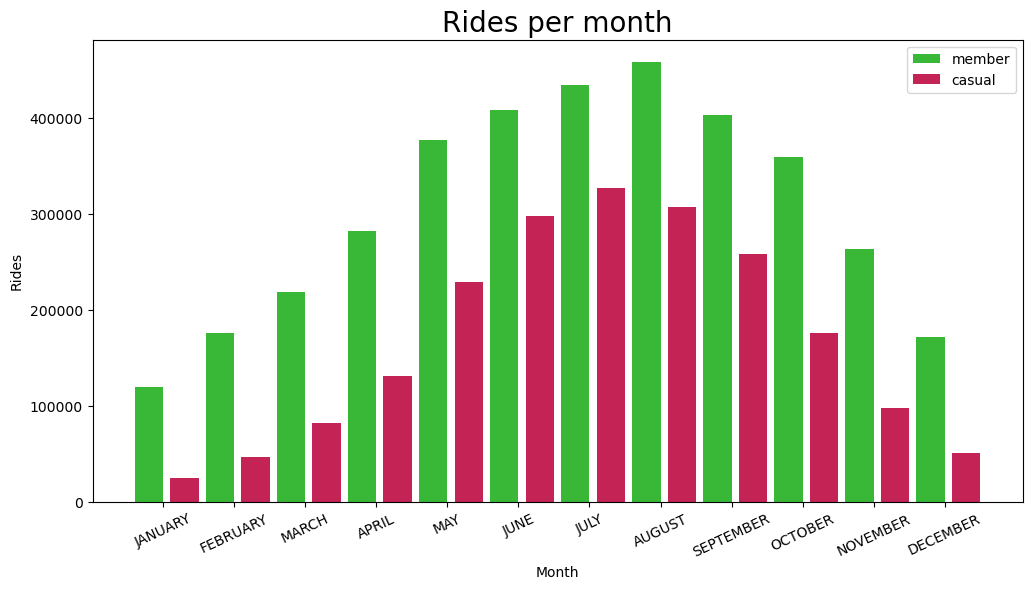

In [30]:
x = df1['n_month'].unique()
labels = df1['month'].unique()
member_count = df1[0][df1['member_casual'] == 'member']
casual_count = df1[0][df1['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.3, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Month')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per month', fontsize=20)
plt.show()

Add % percentages for the bars above.. eg july 15%

### Weekly engagement

In [31]:
week = date_time.loc[:, ['member_casual', 'day', 'n_day_week']]
df2 = week.groupby(['member_casual', 'day', 'n_day_week']).size()
df2 = df2.reset_index().sort_values(['n_day_week'])

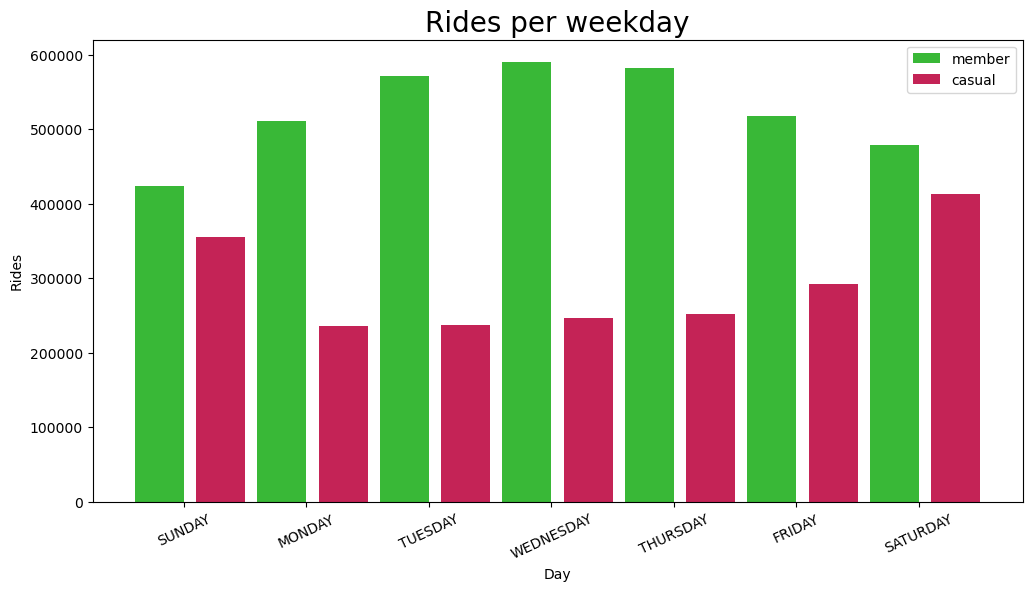

In [32]:
x = df2['n_day_week'].unique()
labels = df2['day'].unique()
member_count = df2[0][df2['member_casual'] == 'member']
casual_count = df2[0][df2['member_casual'] == 'casual']


plt.figure(figsize=(12, 6), dpi=100)
plt.bar(x -0.2, member_count, 0.4, label=G.m, color=G.m_col)
plt.bar(x + 0.3, casual_count, 0.4, label=G.c, color=G.c_col)
plt.xticks(x, labels, rotation=25)
plt.xlabel('Day')
plt.ylabel('Rides')
plt.legend()
plt.title('Rides per weekday', fontsize=20)
plt.show()

In [33]:
df2.head()

,member_casual,day,n_day_week,0
3,casual,SUNDAY,1,355273
10,member,SUNDAY,1,423122
1,casual,MONDAY,2,235323
8,member,MONDAY,2,510488
5,casual,TUESDAY,3,237291


In [34]:
# v is a True or False vector which holds True for every index that is either Sunday or Saturday.
v = (date_time['day'] == 'SATURDAY') | (date_time['day'] == 'SUNDAY')
weekend = date_time[v]
midweek = date_time[-v]
midweek_c = midweek[midweek['member_casual'] == G.c]
midweek_m = midweek[midweek['member_casual'] == G.m]
weekend_c = weekend[weekend['member_casual'] == G.c]
weekend_m = weekend[weekend['member_casual'] == G.m]


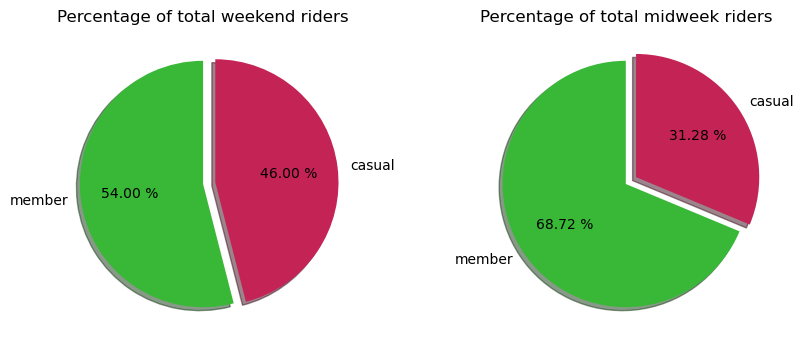

In [54]:
w = round(weekend.value_counts(weekend['member_casual'], normalize=True), 4) * 100
m = round(midweek.value_counts(midweek['member_casual'], normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
# Plot data on the first subplot
ax1.pie(w, 
        labels=w.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True )

ax1.set_title('Percentage of total weekend riders')

# Plot data on the second subplot
ax2.pie(m, 
        labels=m.index, 
        colors=[G.m_col, G.c_col],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)

ax2.set_title('Percentage of total midweek riders')

plt.show()

Text(0.5, 1.0, 'casual riding preference')

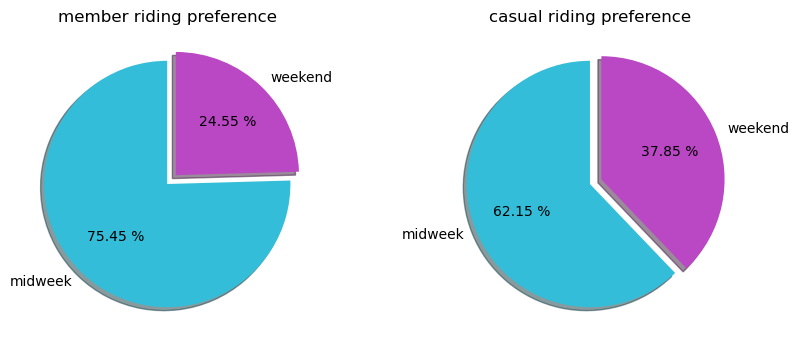

In [36]:
m_m = round( midweek_m.shape[0] / G.m_rides, 4) * 100
m_w = round(weekend_m.shape[0] / G.m_rides, 4) * 100
c_m = round(midweek_c.shape[0] / G.c_rides, 4) * 100
c_w = round(weekend_c.shape[0] / G.c_rides, 4) * 100
proportions = pd.DataFrame([[m_m, m_w],
                            [c_m, c_w] ], 
                            index=[G.m, G.c], columns=['midweek', 'weekend'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100) 
# Plot data on the first subplot
ax1.pie(proportions.loc[G.m], 
        labels=['midweek', 'weekend'], 
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True
        )
ax1.set_title('member riding preference')

# Plot data on the second subplot
ax2.pie(proportions.loc[G.c],
        labels=['midweek', 'weekend'],
        colors=['#34bdd9', '#ba47c4'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)
ax2.set_title('casual riding preference')


### Hourly engagement

In [37]:
# Create an hour table.
hour = date_time.loc[:, ['member_casual', 'start_time']]


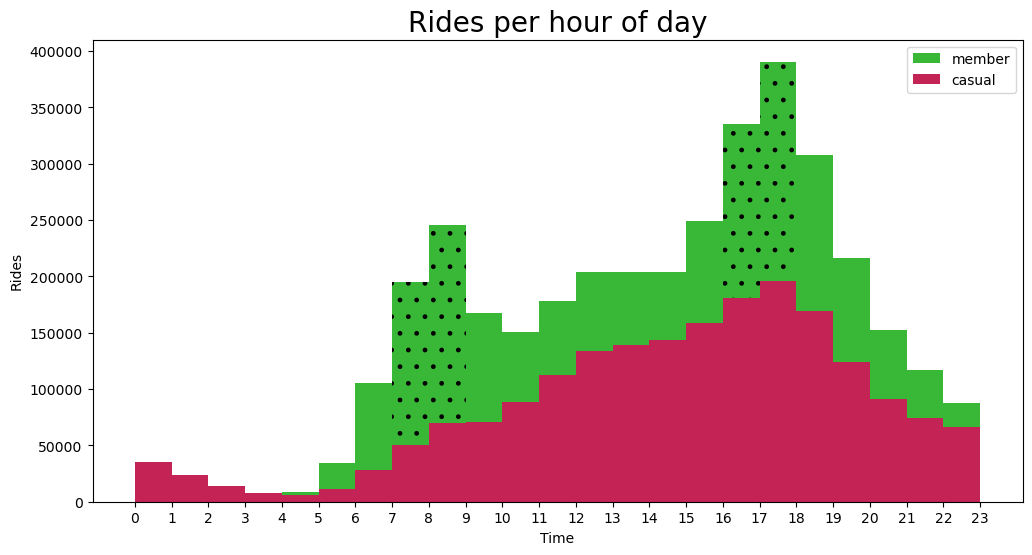

In [56]:
member = hour[hour['member_casual'] == G.m]
casual = hour[hour['member_casual'] == G.c]

plt.figure(figsize=(12, 6), dpi=100)

# Set the bins after taking a look at the default histogram
bins=np.arange(24)

# Create hist but also keep the bars variable in order to label the bars
counts, edges, bars = plt.hist(member['start_time'],bins=bins, color=G.m_col, label=G.m) # choose color from color picker(google search) bins=bins
plt.hist(casual['start_time'],bins=bins, color=G.c_col, label=G.c)

plt.xticks(ticks=bins)

bars[7].set_hatch('.')
bars[8].set_hatch('.')
bars[16].set_hatch('.')
bars[17].set_hatch('.')
#bars[4].set_hatch('**')
#bars[2].set_color('#6354b8')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Rides')
plt.title("Rides per hour of day", fontsize=20)

plt.show()

There is a similar pattern 7 through 9 all the way to 16 through 18. For members there is peak i the afternoon hours.

### Riding times

In [39]:
duration = date_time.loc[:, ['member_casual', 'ride_duration']]
duration.describe()

,ride_duration
count,5.703370e+06
mean,1.488561e+01
std,2.250724e+01
min,0.000000e+00
25%,6.000000e+00
50%,1.000000e+01
75%,1.700000e+01
max,1.439000e+03


For this section we will omit the entries with ride duration outside of the interval (0.30, 40). The reason for this decision has to do with the fact that most of these entries have likely occured due to system malfunctions and they do not add value to our analysis as they are further away for the 1st and 3rd quintiles. There are aslo many values with extreme ridings times (eg. 1000 min ) and many with zero duration which are signs of possible system malfuncctions of riders mistakes. Including them in the overall analysis is an open question.

In [40]:
duration = date_time.loc[:, ['member_casual', 'ride_duration']]
duration = duration[(duration['ride_duration'] > 1.0) & (duration['ride_duration'] < 720)]
m_d = duration[duration['member_casual'] == 'member']
c_d = duration[duration['member_casual'] == 'casual']

In [41]:
m_d['ride_duration'].mean(), c_d['ride_duration'].mean()

(12.376810454130291, 20.537699891610135)

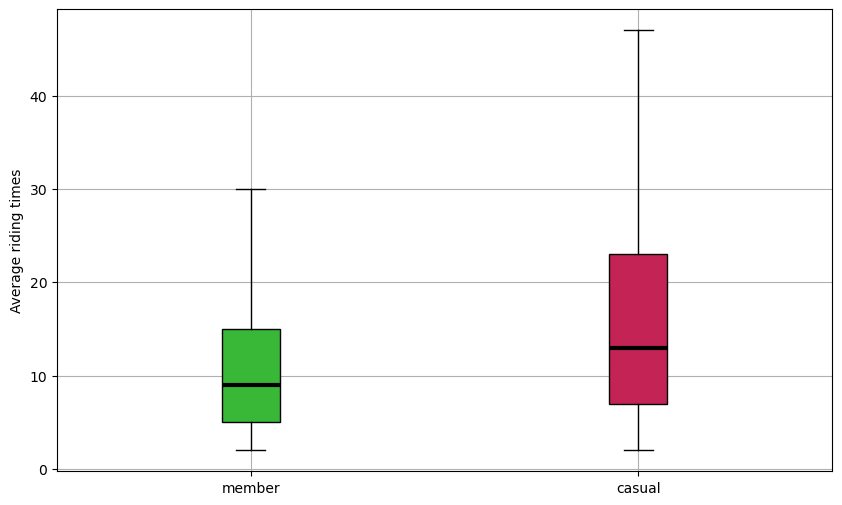

In [42]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.set_ylabel('Average riding times')
arrays = [np.array(m_d['ride_duration']), np.array(c_d['ride_duration'])]
bplot = ax.boxplot(arrays,
                   showfliers=False,
                   patch_artist=True)  # will be used to label x-ticks
colors = [G.m_col, G.c_col]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set(color ='black',
               linewidth = 3)
ax.set_xticklabels([G.m, G.c])
plt.grid()
plt.show()

Casuals seem to prefer longer rides. Having in mind that the data refer to an urban environment, the longer riding times might suggest tourism or other recreational activities espiacialy for rides in the [20 ,35] interval.

### Bike type preference

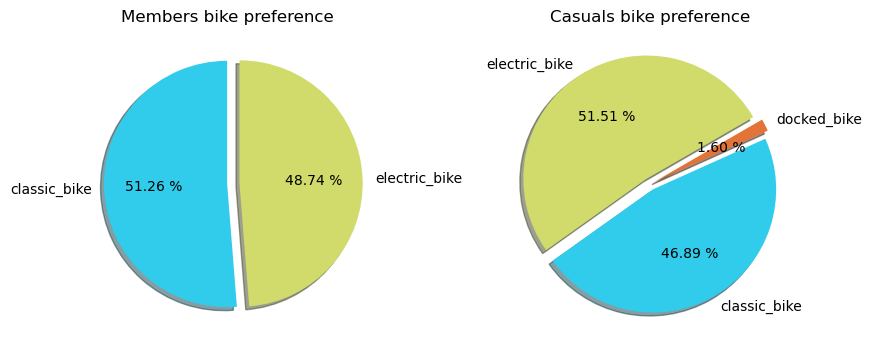

In [43]:
rideable = date_time.loc[:, ['member_casual', 'rideable_type']]

r_m = round(rideable[rideable['member_casual'] == G.m].value_counts(normalize=True), 4) * 100
r_c = round(rideable[rideable['member_casual'] == G.c].value_counts(normalize=True), 4) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
# Plot data on the first subplot
ax1.pie(r_m, 
        labels=r_m.reset_index()['rideable_type'], 
        colors=['#31cceb', '#d0db6b'],
        autopct='%.2f %%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True )
ax1.set_title('Members bike preference')

# Plot data on the second subplot
ax2.pie(r_c, 
        labels=r_c.reset_index()['rideable_type'], 
        colors=['#d0db6b', '#31cceb', '#e37336'],
        autopct='%.2f %%',
        explode=[0.051, 0.05, 0.05],
        startangle=30,
        shadow=True
        )
ax2.set_title('Casuals bike preference')

plt.show()

### Random forests for most important features

Absolutely, Chicago is considered a major tourist destination.

It's often referred to as the "Windy City" and offers a unique blend of urban attractions, rich history, and stunning architecture. Visitors flock to Chicago to experience:

Iconic landmarks: The Willis Tower (formerly Sears Tower), Cloud Gate (The Bean), Navy Pier
World-class museums: Art Institute of Chicago, Field Museum, Shedd Aquarium
Vibrant neighborhoods: Diverse culinary experiences, shopping, and nightlife
Lake Michigan: Beautiful beaches, boat tours, and waterfront activities

### Feature importance

It is agood idea to use some siple machine learning to confirm some of our insights or even gain some new ones.<br>
In this case we can benefit from a simple Random Forest classifier that has the ability to assign an importance score to each feature 
in the training set.<br>
We begin by defining a new dataset that consist only of the numerical represantations for days and months. The rideable_type feature is also excluded because, as we saw earlier, casuals and members have almost identical distributions. So keeping it would only add unnecessary complexity to the model.<br> Next, we use one-hot encoding for n_day_week, because we don't want it to be perceived as a categorical feature.<br>
Lastly, we exclude some extreme values and outliers from ride_duration to reduce their impact on the learning process.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

forest_data = date_time.loc[:, ['member_casual', 'n_month',  'n_day_week', 'start_time',  'ride_duration']]
forest_data = forest_data[(forest_data['ride_duration'] > 0.3)] #& (forest_data['ride_duration'] < 720.0)]
forest_data = pd.get_dummies(forest_data, columns=['n_day_week'])

X_train, X_test, y_train, y_test = train_test_split(forest_data.drop('member_casual', axis=1),
                                forest_data['member_casual'],
                                test_size=5000, 
                                train_size=50000, 
                                random_state=6, 
                                shuffle=True,
                                stratify=forest_data['member_casual'])

le = LabelEncoder()
y_train, y_test = le.fit_transform(y_train), le.fit_transform(y_test)

First lets bulid a dummy classifier that blindly guesses the most frequent class, in order to get a baseline result.

In [45]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf = dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.6446

Now let's train several classifiers using Grid Search, and use cross validation to get the best hyperparameter combination.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[600, 800, 1000],
        'max_features':[7, 8, 9]}

rfc = GridSearchCV(RandomForestClassifier(),
                param_grid=params, 
                cv=3)

rfc = rfc.fit(X_train, y_train)

In [48]:
rfc.best_estimator_

RandomForestClassifier(max_features=9, n_estimators=1000)

In [49]:
rfc = rfc.best_estimator_

rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.6414

The models' performance is mediocre, and it seems that it could benefit by scaling both the training set size and its' hyperparameters.<br>
But, let's look at which are the most important features that our model has 'learned'.

In [50]:
for score, feature in zip(rfc.feature_importances_, rfc.feature_names_in_):
    print(f'Importance of {feature} : {round(score, 3)}')

Importance of n_month : 0.13
Importance of start_time : 0.549
Importance of ride_duration : 0.222
Importance of n_day_week_1 : 0.01
Importance of n_day_week_2 : 0.017
Importance of n_day_week_3 : 0.016
Importance of n_day_week_4 : 0.017
Importance of n_day_week_5 : 0.017
Importance of n_day_week_6 : 0.013
Importance of n_day_week_7 : 0.01


The model seems to recognize ride_duration as, by far, the most important feature for choosing between a member and a casual, followed by ride_duration. Also midweek days seem to play a more important role than weekend days. Although these findings somehow confirm the trends we saw earlier in the graphs, there is a lot of room for improvement fot the model to be considered reliable.

In [51]:
forest_data.loc[forest_data['member_casual'] == 'member'].describe()

,n_month,start_time,ride_duration
count,3.625120e+06,3.625120e+06,3.625120e+06
mean,6.939807e+00,1.418052e+01,1.221589e+01
std,2.880485e+00,4.854566e+00,1.660923e+01
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,5.000000e+00,1.035000e+01,5.000000e+00
50%,7.000000e+00,1.516000e+01,9.000000e+00
75%,9.000000e+00,1.801000e+01,1.500000e+01
max,1.200000e+01,2.358000e+01,1.439000e+03


In [52]:
forest_data.loc[forest_data['member_casual'] == 'casual'].describe()

,n_month,start_time,ride_duration
count,1.998081e+06,1.998081e+06,1.998081e+06
mean,7.075657e+00,1.461630e+01,2.032655e+01
std,2.381762e+00,4.920955e+00,2.990071e+01
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,5.000000e+00,1.155000e+01,7.000000e+00
50%,7.000000e+00,1.531000e+01,1.200000e+01
75%,9.000000e+00,1.817000e+01,2.300000e+01
max,1.200000e+01,2.358000e+01,1.439000e+03


### Stations

In [ ]:
stations.sort_values('casual_rides', ascending=False).head(5)

,station,lat,long,num_of_start_rides,member_rides,casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
372,Streeter Dr & Grand Ave,41.89,-87.61,63714,16457,47257,15484,46163,2067
532,DuSable Lake Shore Dr & Monroe St,41.88,-87.62,42513,10462,32051,10443,30639,1431
262,Michigan Ave & Oak St,41.90,-87.62,37931,14616,23315,11520,25585,826
133,DuSable Lake Shore Dr & North Blvd,41.91,-87.63,37343,15940,21403,9928,26682,733
530,Millennium Park,41.88,-87.62,30220,10199,20021,8907,20431,882


In [ ]:
stations.sort_values('member_rides', ascending=False).head(5)

,station,lat,long,num_of_start_rides,member_rides,casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
531,Clinton St & Washington Blvd,41.88,-87.64,33965,27791,6174,15565,18327,73
371,Kingsbury St & Kinzie St,41.89,-87.64,35450,26731,8719,13301,22067,82
261,Clark St & Elm St,41.90,-87.63,35244,24660,10584,12487,22616,141
529,Clinton St & Madison St,41.88,-87.64,28968,22665,6303,12773,16124,71
132,Wells St & Concord Ln,41.91,-87.64,31799,20659,11140,13166,18527,106


https://public.tableau.com/app/profile/fotios.ntinas/viz/MembersvsCasuals/Sheet1?publish=yes

Stations with dark green bigger circe might indicate places where casual riders show similar behaviour with members. Whereas on stations withbig circle and pale green color there are many casual some of which might be interested to upgrade to premium membership 

it might be very tricky to draw new members from popular tourist attractions but we might be able to find opportunities in recreational park where  locals gather

lets look for stations with ratio of members / casuals near 1

In [ ]:
stations_to_keep = stations.loc[(stations['member_rides'] / stations['casual_rides'] > 0.8) & 
             (stations['member_rides'] / stations['casual_rides'] < 1.2) & 
             (stations['num_of_start_rides'] > 5000)].sort_values(['num_of_start_rides'], ascending=False)
stations_to_keep

,station,lat,long,num_of_start_rides,member_rides,casual_rides,electric_bike_rides,classic_bike_rides,docked_bike_rides
962,Theater on the Lake,41.93,-87.630,29956,13538,16418,7250,22261,445
351,Wabash Ave & Wacker Pl,41.89,-87.630,12930,6797,6133,4712,8078,140
302,Lakefront Trail & Bryn Mawr Ave,41.98,-87.650,12427,6610,5817,4653,7623,151
510,Michigan Ave & Jackson Blvd,41.88,-87.620,12180,5637,6543,3543,8336,301
242,Michigan Ave & Pearson St,41.90,-87.620,10318,5331,4987,3033,7029,256
422,Lakefront Trail & Wilson Ave,41.97,-87.641,8460,4000,4460,2334,5886,240
492,Michigan Ave & Ida B Wells Dr,41.88,-87.621,7655,3606,4049,2232,5261,162
26,Chicago Ave & Sheridan Rd,42.05,-87.680,5263,2867,2396,1623,3604,36


<hr>